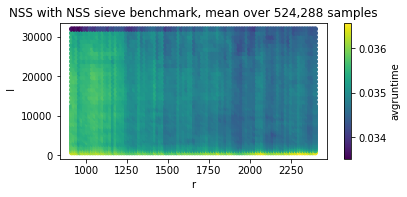

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from mpl_toolkits import mplot3d

stock_files = sorted(glob("../data/nss_benchmark/nss_sieve/3rdrun_r*.csv"))
df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)


#create vec with truth vars if some condition met
#l_small = df2['r'] <= 1024

df = df.groupby(['r', ' l']).mean() #for final 64x runs
df.columns = df.columns.str.strip()
df = df.reset_index()

""" r = df.r
l = df.l
avgruntime = df.avgruntime

# 2d preprocessing
order = np.argsort(r)
rx = np.array(r)[order]
ay = np.array(avgruntime)[order]

#2d
plt.title("NSS with NSS sieve benchmark on 8192 samples, averaged out in 64 runs")
plt.xlabel('r')
plt.ylabel('average runtime [s]')
plt.plot(rx, ay) """

#plt.savefig("../plots/3rd_ossl_ossl.jpg")

#3d
fig = df.plot.scatter(x=0, y=1, c=2, colormap="viridis", sharex=False, figsize=(6,2.5))
fig.set_title("NSS with NSS sieve benchmark, mean over 524,288 samples")
fig.figure.savefig("../plots/3rd_nss_nss.jpg", bbox_inches = "tight", dpi=300)